In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv("/content/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
print(data.shape)
print(data.describe())

(7973, 31)
               Time           V1           V2           V3           V4  \
count   7973.000000  7973.000000  7973.000000  7973.000000  7973.000000   
mean    4257.151261    -0.299740     0.295226     0.899355     0.215736   
std     3198.964299     1.498341     1.283914     1.090297     1.447057   
min        0.000000   -23.066842   -25.640527   -12.389545    -4.657545   
25%     1531.000000    -1.046362    -0.237359     0.372435    -0.687521   
50%     3635.000000    -0.416341     0.335446     0.948695     0.223379   
75%     6662.000000     1.122758     0.950582     1.597949     1.131542   
max    10981.000000     1.685314     8.261750     4.101716     7.380245   

                V5           V6           V7           V8           V9  ...  \
count  7973.000000  7973.000000  7973.000000  7973.000000  7973.000000  ...   
mean     -0.025285     0.157286    -0.026445    -0.070525     0.655244  ...   
std       1.167218     1.325015     1.063709     1.332568     1.156618  ... 

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0031458411979363283
Fraud Cases: 25
Valid Transactions: 7947


In [6]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,25.000000
mean,106.308400
std,372.676883
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000


In [7]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,7947.000000
mean,65.284891
std,194.126547
min,0.000000
25%,4.795000
50%,15.950000
75%,54.990000
max,7712.430000


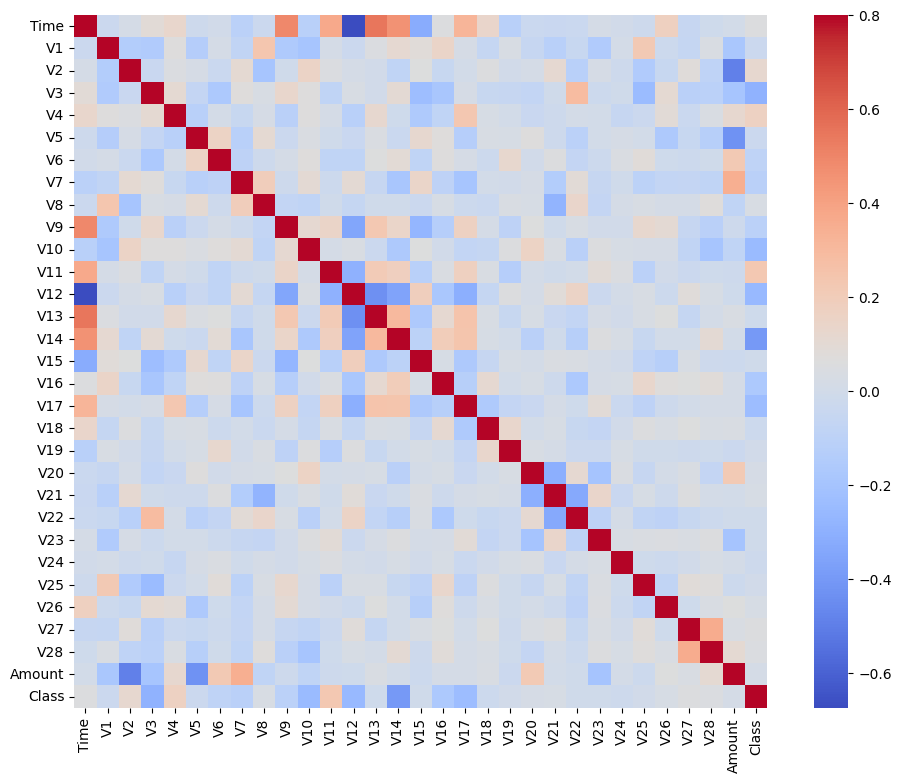

In [26]:
# Plot the correlation matrix with a different color palette
corrmat = data.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap="coolwarm")  # Use the 'coolwarm' color map
plt.show()


In [16]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(7973, 30)
(7973,)


In [17]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [18]:
import numpy as np

print(np.isnan(yTrain).sum())  # This will print the number of NaN values in yTrain

0


In [12]:
# Get indices where yTrain is not NaN
valid_indices = ~np.isnan(yTrain)

# Filter xTrain and yTrain to remove NaN values
xTrain = xTrain[valid_indices]
yTrain = yTrain[valid_indices]

In [13]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [21]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import numpy as np

# Check for NaN values in yTest and yPred, and remove any rows where either is NaN
yTest_clean = yTest[~np.isnan(yTest) & ~np.isnan(yPred)]
yPred_clean = yPred[~np.isnan(yTest) & ~np.isnan(yPred)]

# Now you can evaluate the cleaned data
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest_clean, yPred_clean)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest_clean, yPred_clean)
print("The precision is {}".format(prec))

rec = recall_score(yTest_clean, yPred_clean)
print("The recall is {}".format(rec))

f1 = f1_score(yTest_clean, yPred_clean)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest_clean, yPred_clean)
print("The Matthews correlation coefficient is {}".format(MCC))


The model used is Random Forest classifier
The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
The Matthews correlation coefficient is 1.0


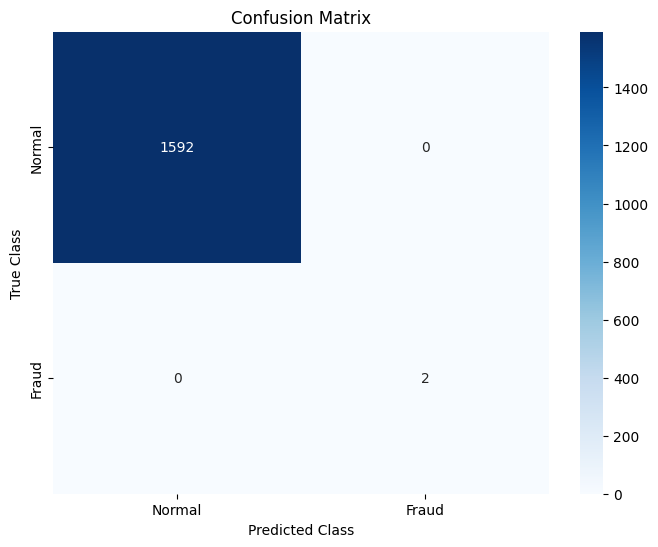

In [25]:
# Remove NaNs in yTest and yPred for the confusion matrix
yTest_clean = yTest[~np.isnan(yTest) & ~np.isnan(yPred)]
yPred_clean = yPred[~np.isnan(yTest) & ~np.isnan(yPred)]

# Calculate the confusion matrix using the cleaned data
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest_clean, yPred_clean)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
